# Ideal Lowpass Filter

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from util import show_image

### prepare image

In [2]:
img_path = '/Users/jeonhyeonbin/Documents/CSED551/assn1/assn2/images/cat.jpg'

In [3]:
img_rgb = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)/255.         # RGB
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.    # grayscale

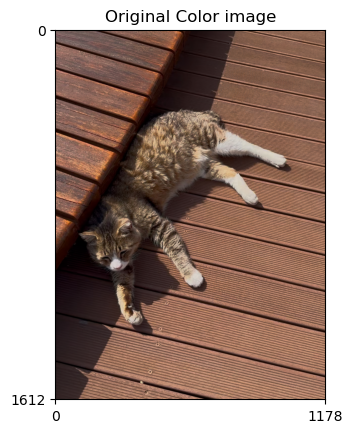

In [4]:
show_image(img_rgb, 'Original Color image')

### Fourier transformation of original image

In [5]:
def show_spectrum(img):
    if img.ndim == 3:
        height, width, _= img.shape
        channels = cv2.split(img)       # 채널별 분리
        names = ['R', 'G', 'B']
        fig, axes = plt.subplots(1, 3)
        for i, channel in enumerate(channels):
            # 각 채널에 대해 2차원 FFT 수행
            f = np.fft.fft2(channel)
            # 중심부에 주파수 성분이 오도록 shift 적용
            fshift = np.fft.fftshift(f)
            # 로그 스케일을 적용하여 시각화를 용이하게 함
            spectrum = 20 * np.log(np.abs(fshift) + 1)
            axes[i].imshow(spectrum, cmap='gray')
            axes[i].set_title(f'{names[i]} channel')
            axes[i].axis('on')
            axes[i].set_xticks([0, width - 1])
            axes[i].set_yticks([0, height - 1])
        plt.tight_layout()
        plt.show()
    else:
        height, width, = img.shape
        f = np.fft.fft2(img)
        spectrum = np.log(np.abs(f))
        plt.imshow(np.fft.fftshift(spectrum), cmap = 'gray')
        plt.xticks([0, width - 1])
        plt.yticks([0, height - 1])
        plt.show()

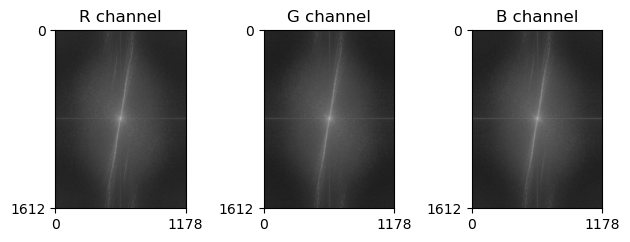

In [6]:
show_spectrum(img_rgb)

### ideal lowpass filter design

In [7]:
def visualize_ideal_lpf(img_shape, cutoff, pad_size=10):
    """Ideal Low Pass Filter의 모양을 시각화하는 함수

    Args:
        img_shape (tuple): 원본 이미지의 크기 (height, width)
        cutoff (real): 필터 반지름
        pad_size (int, optional): 패딩 크기
    """
    # 패딩을 고려한 크기 계산
    M = img_shape[0] + 2 * pad_size
    N = img_shape[1] + 2 * pad_size
    
    # LPF 마스크 생성
    center_x, center_y = M // 2, N // 2
    lpf = np.zeros((M, N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i - center_x)**2 + (j - center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    # 필터 모양 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(lpf, cmap='gray')
    plt.title(f'Ideal Low Pass Filter (Cutoff = {cutoff})')
    plt.axis('off')  # 축 제거
    plt.show()

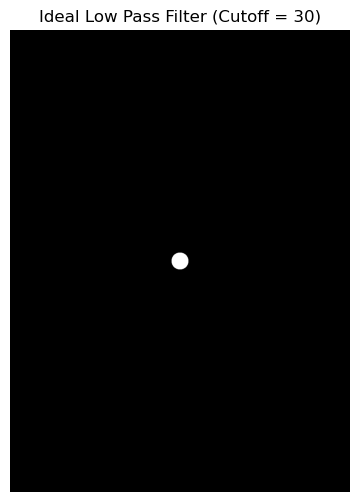

In [8]:
visualize_ideal_lpf(img_gray.shape, 30, pad_size=10)

### ideal lowpass filtering on grayscale image

- `ideal_lpf_gray_show_result`는 필터링을 한 이미지의 푸리에 변환 결과를 보여줌
- `ideal_lpf_gray`는 필터링만 함

In [9]:
def ideal_lpf_gray_show_result(img, cutoff, pad_size=10):
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)

    f = np.fft.fft2(padded_img) # 푸리에 변환
    fs = np.fft.fftshift(f) # 중앙으로 주파수 성분 재배열
    
    # build lpf mask
    M, N = padded_img.shape
    center_x, center_y = M//2, N//2
    lpf = np.zeros((M,N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    f_ = fs * lpf # 필터적용
    
    # f_ 시각화
    spectrum = 20 * np.log(np.abs(f_) + 1)  # 로그 스케일로 스펙트럼 계산
    plt.figure(figsize=(5, 5))
    plt.imshow(spectrum, cmap='gray')
    plt.title(f'Spectrum of f_ (cutoff={cutoff})')
    plt.axis('off')
    plt.show()
    
    inv = np.fft.ifftshift(f_)  # 중앙에 배치되어있던 배열 복원
    inv_img = np.fft.ifft2(inv) # 역푸리에 변환
    inv_img = np.abs(inv_img)   # 실수값으로 변환
    
    return inv_img[pad_size:-pad_size, pad_size:-pad_size]

In [10]:
def ideal_lpf_gray(img, cutoff, pad_size=10):
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)

    f = np.fft.fft2(padded_img) # 푸리에 변환
    fs = np.fft.fftshift(f) # 중앙으로 주파수 성분 재배열
    
    # build lpf mask
    M, N = padded_img.shape
    center_x, center_y = M//2, N//2
    lpf = np.zeros((M,N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    f_ = fs * lpf # 필터적용
    
    """
    # f_ 시각화
    spectrum = 20 * np.log(np.abs(f_) + 1)  # 로그 스케일로 스펙트럼 계산
    plt.figure(figsize=(5, 5))
    plt.imshow(spectrum, cmap='gray')
    plt.title(f'Spectrum of f_ (cutoff={cutoff})')
    plt.axis('off')
    plt.show()    
    """
    inv = np.fft.ifftshift(f_)  # 중앙에 배치되어있던 배열 복원
    inv_img = np.fft.ifft2(inv) # 역푸리에 변환
    inv_img = np.abs(inv_img)   # 실수값으로 변환
    
    return inv_img[pad_size:-pad_size, pad_size:-pad_size]

### ideal lowpass filtering on color image

In [11]:
def ideal_lpf_rgb(img, cutoff, pad_size=10):
    b, g, r = cv2.split(img) # OpenCV는 bgr순서
    
    b_ = ideal_lpf_gray(b, cutoff, pad_size=pad_size).astype(np.float32)
    g_ = ideal_lpf_gray(g, cutoff, pad_size=pad_size).astype(np.float32)
    r_ = ideal_lpf_gray(r, cutoff, pad_size=pad_size).astype(np.float32)
    
    return cv2.merge([b_, g_, r_])

In [12]:
def ideal_lpf_rgb_show_result(img, cutoff, pad_size=10):
    b, g, r = cv2.split(img) # OpenCV는 bgr순서
    
    b_ = ideal_lpf_gray_show_result(b, cutoff, pad_size=pad_size).astype(np.float32)
    g_ = ideal_lpf_gray_show_result(g, cutoff, pad_size=pad_size).astype(np.float32)
    r_ = ideal_lpf_gray_show_result(r, cutoff, pad_size=pad_size).astype(np.float32)
    
    #return cv2.merge([b_, g_, r_])    

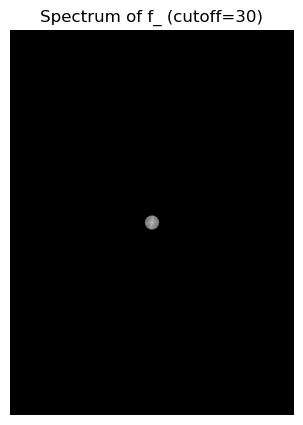

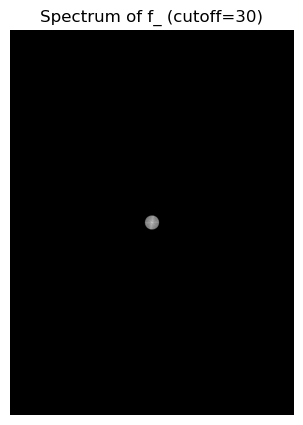

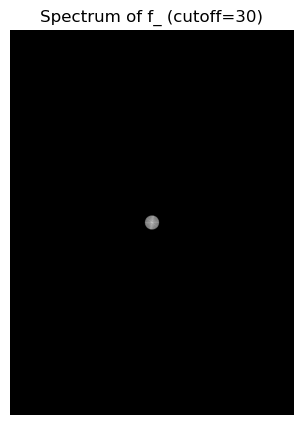

In [13]:
ideal_lpf_rgb_show_result(img_rgb, 30, 15)

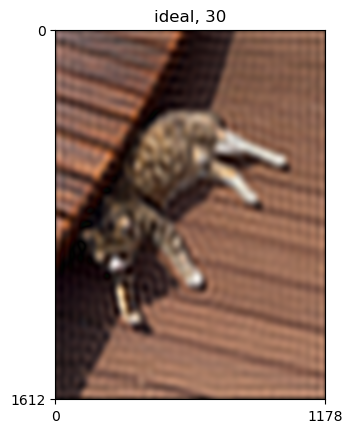

In [14]:
show_image(ideal_lpf_rgb(img_rgb, 30, 15), 'ideal, 30')

### results of different lpf sizes

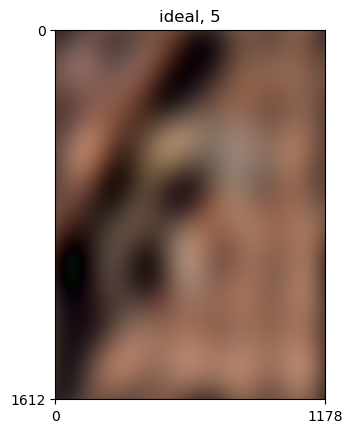

In [15]:
show_image(ideal_lpf_rgb(img_rgb, 5, 15), 'ideal, 5')

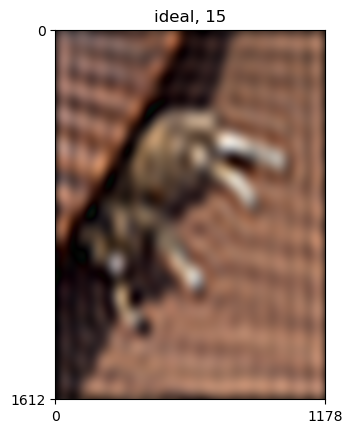

In [16]:
show_image(ideal_lpf_rgb(img_rgb, 15, 15), 'ideal, 15')

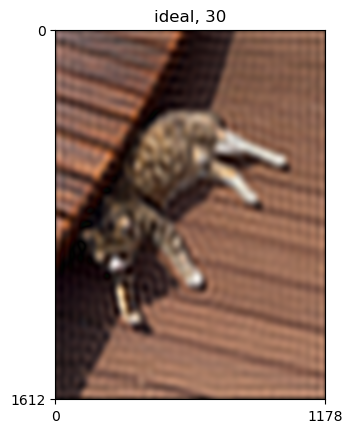

In [17]:
show_image(ideal_lpf_rgb(img_rgb, 30, 15), 'ideal, 30')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


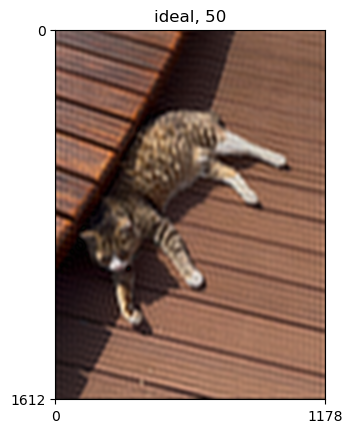

In [18]:
show_image(ideal_lpf_rgb(img_rgb, 50, 15), 'ideal, 50')

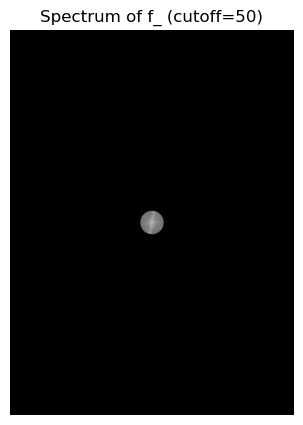

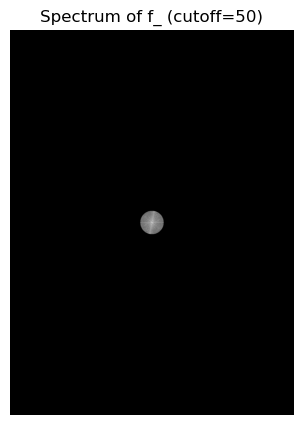

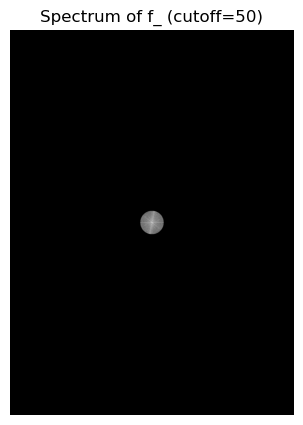

In [19]:
ideal_lpf_rgb_show_result(img_rgb, 50, 15)

In [28]:
img_color = cv2.imread('/Users/jeonhyeonbin/Documents/CSED551/assn1/assn2/images/example.jpg', cv2.IMREAD_COLOR).astype(np.float32)/255.         # RGB

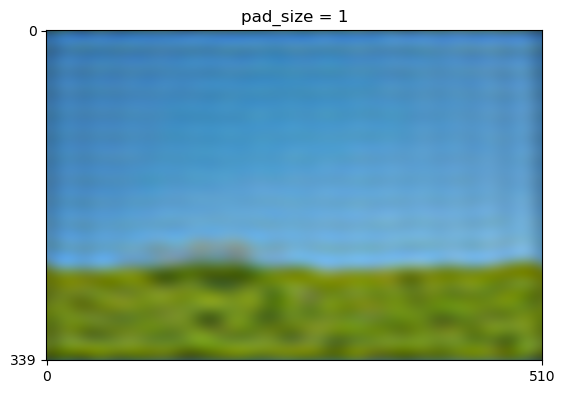

In [34]:
show_image(ideal_lpf_rgb(img_color, 15, 1), 'pad_size = 1')

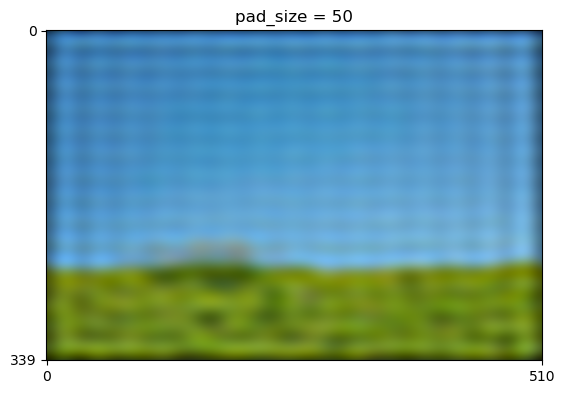

In [39]:
show_image(ideal_lpf_rgb(img_color, 15, 3), 'pad_size = 50')